<a href="https://colab.research.google.com/github/tkhan3/airo/blob/master/MNIST_Keras_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries
This is required for a basic code setup. You need to import prebuilt libraries to code in your notebook.
This libaries will allow you to use API.

In [0]:
import matplotlib.pyplot as plt  ##library for visualization
import tensorflow as tf   ## deep learning library for python
import numpy as np  ## array and matrix multiplication library for python

# Check version of the libraries

In [3]:
print(tf.__version__)

2.2.0


# Load the Dataset. 
We are using a prebuilt datasets. In real life we would need to read the dataset from files or a database or cloud storage etc.

Here we are splitting datasets in two folds. Train Set and Test Set. We will use train set for training the model and test set for validating model accuracies.

In [5]:
mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


# Let's display what all classes we have. 
We will train a model to feed image and find what is the class of image.
# Our model will learn to recognize images.

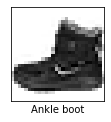

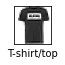

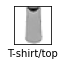

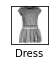

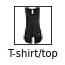

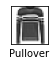

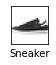

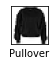

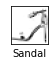

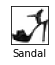

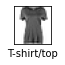

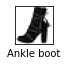

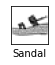

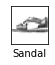

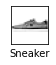

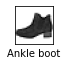

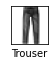

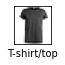

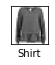

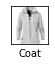

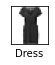

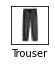

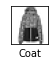

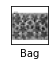

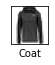

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
    plt.show()

# Let's build an Dense Neural Network and train it to recognize images

In [0]:
layers = tf.keras.layers

# Define Neural Network Architecture

In [0]:
model = tf.keras.Sequential()  ##use sequential fully connected model
model.add(layers.Flatten())   ## flatten the input 
model.add(layers.Dense(64, activation='relu'))  ## use relu activation
model.add(layers.Dense(64, activation='relu'))  ## use relu activation 
model.add(layers.Dense(10, activation='softmax'))  ## finally do the softmax for classification
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])  ##loss is the function that neural network try to minimize during back prop

# Start Training Process. We will train for smaller epoch for a quick run

In [11]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7647 - accuracy: 0.7317
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6408 - accuracy: 0.7918
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5784 - accuracy: 0.8094
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5448 - accuracy: 0.8180
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4939 - accuracy: 0.8289


# Test The Performance Of Model on evaluate set

In [12]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4912 - accuracy: 0.8342


[0.49118149280548096, 0.8342000246047974]

In [0]:
predictions = model.predict(x_test)

In [16]:
predictions[0,:]

array([5.3274731e-09, 1.5877698e-13, 6.8368639e-10, 3.6797003e-11,
       4.1336444e-13, 1.0258237e-02, 3.5079717e-09, 5.4601736e-02,
       4.0925002e-08, 9.3514001e-01], dtype=float32)

In [17]:
np.argmax(predictions[0,:])

9

# Test A Prediction For A Image

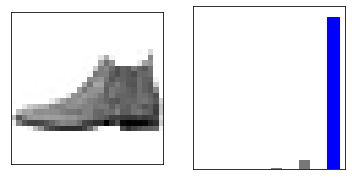

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test)
plt.show()

In [29]:
class_names[np.argmax(predictions[0,:])]

'Ankle boot'

# Setup The Plotting Librarires

In [0]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red" 
        plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label]),
 color=color)
        
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")